In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

fake-and-real-news-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile

local_zip = 'fake-and-real-news-dataset.zip'
zip_ref = ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
import pandas as pd
import numpy as np

fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
new_fake = fake.drop(['date'], axis=1) # drop unused column
new_fake['label'] = 0 # create new column label with 0 value
new_fake.head()

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0


In [9]:
new_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   label    23481 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 733.9+ KB


In [10]:
print('The total missing value in fake dataframe:', new_fake.isnull().sum().sum())

The total missing value in fake dataframe: 0


In [11]:
new_true = true.drop(['date'], axis=1)
new_true['label'] = 1 # create new column label with 1 value
new_true.head()

,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


In [12]:
new_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   label    21417 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 669.4+ KB


In [13]:
print('The total missing value in true dataframe:', new_true.isnull().sum().sum())

The total missing value in true dataframe: 0


In [14]:
df = pd.concat([new_fake, new_true])
df.head()

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0


In [15]:
new_df = df.sample(frac=1).reset_index(drop=True) # shuffle the row and reset the index
new_df.head()

,title,text,subject,label
0,PRESIDENT TRUMP Describes Receiving Nuclear Co...,Pres. Trump on receiving nuclear codes: It is...,Government News,0
1,The NRA Is ‘Proud’ That They Just Made A Vira...,"The National Rifle Association, who has become...",News,0
2,Argentine TV ad mocks Trump to promote soccer ...,BUENOS AIRES (Reuters) - An Argentine TV stati...,politicsNews,1
3,[VIDEO] WHAT JERRY SEINFELD HAS TO SAY ABOUT O...,"Kids Just Want To Use Words That s racist, th...",left-news,0
4,Clinton’s Devastating New Ad Puts Trump’s Whi...,On the same day as Hillary Clinton denounced D...,News,0


In [16]:
new_df.tail()

,title,text,subject,label
44893,BALTIMORE POLICE UNION WANTS AN INDEPENDANT PR...,The Police Union came out almost immediately a...,politics,0
44894,U.S. Senate backs waiver allowing Mattis to le...,WASHINGTON (Reuters) - The U.S. Senate overwhe...,politicsNews,1
44895,Obama administration bars new oil exploration ...,WASHINGTON (Reuters) - The Obama administratio...,politicsNews,1
44896,Long-stalled email privacy bill advances in Co...,WASHINGTON (Reuters) - Legislation that would ...,politicsNews,1
44897,Ohio Democratic Headquarters Vandalized With ...,"This has been one nasty election year. First, ...",News,0


In [17]:
new_df.shape

(44898, 4)

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

new_df['length'] = new_df['text'].apply(len)
new_df.head()

,title,text,subject,label,length
0,PRESIDENT TRUMP Describes Receiving Nuclear Co...,Pres. Trump on receiving nuclear codes: It is...,Government News,0,770
1,The NRA Is ‘Proud’ That They Just Made A Vira...,"The National Rifle Association, who has become...",News,0,2793
2,Argentine TV ad mocks Trump to promote soccer ...,BUENOS AIRES (Reuters) - An Argentine TV stati...,politicsNews,1,2404
3,[VIDEO] WHAT JERRY SEINFELD HAS TO SAY ABOUT O...,"Kids Just Want To Use Words That s racist, th...",left-news,0,1811
4,Clinton’s Devastating New Ad Puts Trump’s Whi...,On the same day as Hillary Clinton denounced D...,News,0,1681


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


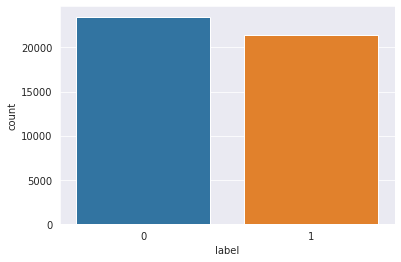

In [19]:
sns.countplot(new_df['label'])

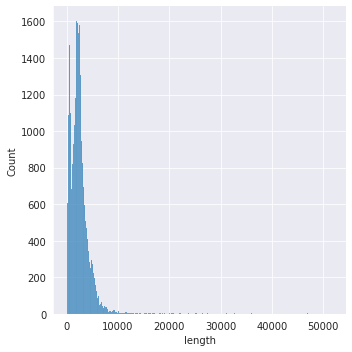

In [20]:
sns.displot(new_df['length'], kde=False)

[Text(0, 0, 'Government News'),
 Text(0, 0, 'News'),
 Text(0, 0, 'politicsNews'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Middle-east'),
 Text(0, 0, 'US_News')]

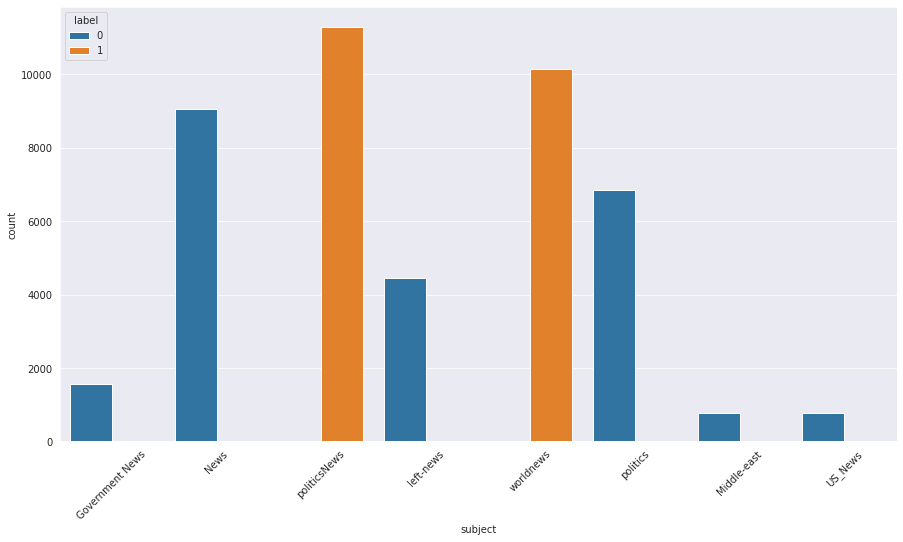

In [21]:
plt.figure(figsize=(15,8))
plot = sns.countplot(x='subject', hue='label', data=new_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

In [22]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')
punctuations = list(string.punctuation)
stop_words.extend(punctuations)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
import re

def fill_title_in_text(index):
  text = df['title'].iloc[index]
  return text
  
def remove_stopwords(text):
  new_text = []
  for i in text.lower().split():
      word = i.strip()
      if word not in stop_words:
          new_text.append(i)
  return new_text

def denoise_text(text):
  index = text.name
  text = list(text)[0]
  if text == ' ':
    text = fill_title_in_text(index)
  text = re.sub(r'bit\S+', '', text) # removing bit.ly/*
  text = re.sub(r'\([^]]*\)', '', text) # removing parenthesis
  text = re.sub(r'\[[^]]*\]', '', text) # removing third brackets
  text = re.sub(r'([\.\\\+\*\?\[\^\]\$\(\)\{\}\!\<\>\|\:\-\,\"\”\“\‘])', '', text) # removing special characteres from the the words
  text = remove_stopwords(text)
  return ' '.join(text)

In [24]:
new_df['soup'] = (new_df['title'] + new_df['text']).to_frame(0).apply(denoise_text, axis = 1)
new_df.head()

,title,text,subject,label,length,soup
0,PRESIDENT TRUMP Describes Receiving Nuclear Co...,Pres. Trump on receiving nuclear codes: It is...,Government News,0,770,president trump describes receiving nuclear co...
1,The NRA Is ‘Proud’ That They Just Made A Vira...,"The National Rifle Association, who has become...",News,0,2793,nra proud’ made viral video telling supporters...
2,Argentine TV ad mocks Trump to promote soccer ...,BUENOS AIRES (Reuters) - An Argentine TV stati...,politicsNews,1,2404,argentine tv ad mocks trump promote soccer tou...
3,[VIDEO] WHAT JERRY SEINFELD HAS TO SAY ABOUT O...,"Kids Just Want To Use Words That s racist, th...",left-news,0,1811,jerry seinfeld say overly pc college kids make...
4,Clinton’s Devastating New Ad Puts Trump’s Whi...,On the same day as Hillary Clinton denounced D...,News,0,1681,clinton’s devastating new ad puts trump’s whit...


In [25]:
X = new_df['soup']
y = new_df['label']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
print('Total X_train:', len(X_train))
print('Total X_valid:', len(X_valid))
print('Total y_train:', len(y_train))
print('Total y_valid:', len(y_valid))

Total X_train: 35918
Total X_valid: 8980
Total y_train: 35918
Total y_valid: 8980


In [28]:
print('X_train shape:', X_train.shape)
print('X_valid shape:', X_valid.shape)
print('y_train shape:', y_train.shape)
print('y_valid shape:', y_valid.shape)

X_train shape: (35918,)
X_valid shape: (8980,)
y_train shape: (35918,)
y_valid shape: (8980,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


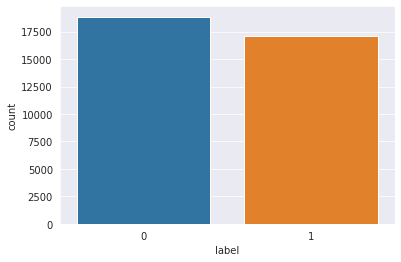

In [29]:
sns.countplot(y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


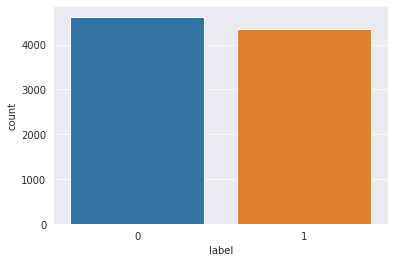

In [30]:
sns.countplot(y_valid)

In [31]:
vocab_size = 10000
maxlen = 1000
embedding_dim = 200
pad_trunc_type = 'post'

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
valid_sequences = tokenizer.texts_to_sequences(X_valid)

padded_train = pad_sequences(train_sequences, maxlen=maxlen, padding=pad_trunc_type, truncating=pad_trunc_type)
padded_valid = pad_sequences(valid_sequences, maxlen=maxlen, padding=pad_trunc_type, truncating=pad_trunc_type)

In [33]:
glove_file = '/content/drive/MyDrive/glove.twitter.27B.200d.txt'

In [34]:
def get_coef(word, *arr):
  return word, np.asarray(arr, dtype='float32')

In [35]:
embedding_index = dict(get_coef(*o.rstrip().rsplit(' ')) for o in open(glove_file, encoding='utf8'))

In [36]:
embed = np.stack(embedding_index.values())
embed_mean, embed_std = embed.mean(), embed.std()
embed_size = embed.shape[1]

word_index = tokenizer.word_index
nb_words = min(vocab_size, len(word_index))
embedding_matrix = embedding_matrix = np.random.normal(embed_mean, embed_std, (nb_words, embed_size))
for word, i in word_index.items():
  if i >= vocab_size:
    continue
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

model = Sequential([
  Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False),
  LSTM(128, return_sequences=True, dropout=0.2),
  LSTM(64, return_sequences=True, dropout=0.1),
  Dense(32, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 200)         2000000   
                                                                 
 lstm (LSTM)                 (None, 1000, 128)         168448    
                                                                 
 lstm_1 (LSTM)               (None, 1000, 64)          49408     
                                                                 
 dense (Dense)               (None, 1000, 32)          2080      
                                                                 
 dense_1 (Dense)             (None, 1000, 1)           33        
                                                                 
Total params: 2,219,969
Trainable params: 219,969
Non-trainable params: 2,000,000
_________________________________________________________________


In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
from tensorflow.keras.callbacks import Callback

class Callback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.91 and logs.get('val_accuracy') > 0.91:
            print('\nStopping training. Accuracy has reached 91%')
            self.model.stop_training = True

In [40]:
callbacks = Callback()

In [41]:
epochs = 100
batch_size = 256

In [42]:
history = model.fit(
    padded_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(padded_valid, y_valid),
    callbacks=[callbacks]
)

Epoch 1/100
141/141 [==============================] - 41s 207ms/step - loss: 0.6513 - accuracy: 0.5815 - val_loss: 0.6765 - val_accuracy: 0.5560
Epoch 2/100
141/141 [==============================] - 29s 206ms/step - loss: 0.6158 - accuracy: 0.6460 - val_loss: 0.8102 - val_accuracy: 0.5569
Epoch 3/100
141/141 [==============================] - 29s 208ms/step - loss: 0.3779 - accuracy: 0.8398 - val_loss: 0.2827 - val_accuracy: 0.8790
Epoch 4/100
141/141 [==============================] - 30s 212ms/step - loss: 0.2114 - accuracy: 0.9208 - val_loss: 0.2400 - val_accuracy: 0.9098
Epoch 5/100
141/141 [==============================] - ETA: 0s - loss: 0.1601 - accuracy: 0.9401
Stopping training. Accuracy has reached 91%
141/141 [==============================] - 30s 213ms/step - loss: 0.1601 - accuracy: 0.9401 - val_loss: 0.1393 - val_accuracy: 0.9451


In [43]:
def plot_history(history=history, type_='accuracy'):
  plt.plot(history.history[type_])
  plt.plot(history.history['val_' + type_])
  plt.title('model ' + type_)
  plt.ylabel(type_)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

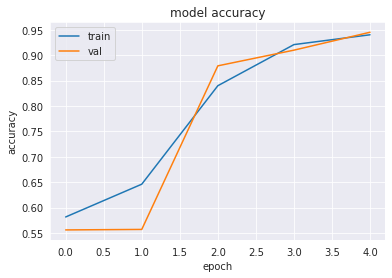

In [44]:
plot_history()

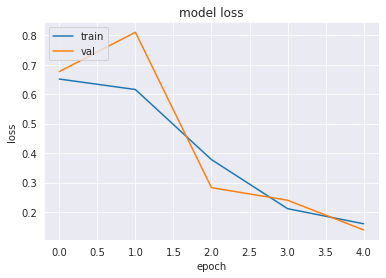

In [45]:
plot_history(type_='loss')